In [50]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE,mean_absolute_error as MAE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import datetime
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [51]:
data=pd.read_csv('D:/thesis/USA_traffic_accident/USA-MapQuest-census-streettype-resampled.csv')

In [52]:
pd.set_option('display.max_columns', 1000)
data=data.drop(['Street','City','County','State','Zipcode','Airport_Code'],axis=1)

In [53]:
data = data.replace([True, False], [1,0])
data = data.replace(['Day','Night'],[1,0])

In [54]:
data

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Minute,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,142026,4,34.914188,-82.107170,5.55,R,US/Eastern,58.0,81.0,28.96,10.0,CALM,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11,5,327,0,31.0,0,1,302195.0,84.4,0.4,1.4,50179.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,205564,4,43.012577,-77.439354,6.29,R,US/Eastern,53.0,83.0,29.72,10.0,SE,6.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4,256,2,153.0,0,1,109472.0,83.2,0.6,3.2,63359.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,444748,4,40.380539,-76.660156,7.84,R,US/Eastern,59.0,100.0,29.50,1.0,CALM,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,5,103,4,279.0,0,1,274515.0,77.9,2.4,3.9,58916.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,153352,4,34.011436,-81.148201,5.93,R,US/Eastern,69.0,22.0,29.90,10.0,NW,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,3,332,13,783.0,0,1,286316.0,84.2,0.2,0.7,59593.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,399462,4,39.801861,-104.984962,0.00,R,US/Mountain,34.0,93.0,24.03,10.0,S,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,2,142,2,174.0,0,1,497115.0,78.2,3.7,1.1,67575.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,258579,2,41.272629,-95.894127,0.00,L,US/Central,88.0,55.0,28.85,10.0,S,17.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,196,16,960.0,0,0,93503.0,85.0,0.9,1.6,57467.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79996,414319,2,30.317110,-81.734093,1.46,R,US/Eastern,81.0,58.0,30.23,10.0,E,9.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,92,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1,120,10,627.0,0,0,924229.0,80.0,1.8,1.7,53473.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79997,257415,3,33.541023,-117.674370,0.00,R,US/Pacific,74.0,66.0,29.91,9.0,W,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,6,195,10,643.0,0,0,3164182.0,78.7,2.0,1.9,85398.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
79998,534318,2,30.402229,-91.170517,0.00,L,US/Central,38.0,89.0,30.21,10.0,N,14.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11,1,316,6,381.0,0,0,444094.0,83.2,1.4,2.0,52719.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# dataset为数据集  product_tags为需要编码的特征列(假设为第一列)
product_tags = ['Side','Timezone','Wind_Direction']
from sklearn.preprocessing import LabelEncoder
for col in product_tags:
    le = LabelEncoder()
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [56]:
data

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Minute,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,142026,4,34.914188,-82.107170,5.55,1,1,58.0,81.0,28.96,10.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11,5,327,0,31.0,0,1,302195.0,84.4,0.4,1.4,50179.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,205564,4,43.012577,-77.439354,6.29,1,1,53.0,83.0,29.72,10.0,6,6.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4,256,2,153.0,0,1,109472.0,83.2,0.6,3.2,63359.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,444748,4,40.380539,-76.660156,7.84,1,1,59.0,100.0,29.50,1.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,5,103,4,279.0,0,1,274515.0,77.9,2.4,3.9,58916.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,153352,4,34.011436,-81.148201,5.93,1,1,69.0,22.0,29.90,10.0,4,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,3,332,13,783.0,0,1,286316.0,84.2,0.2,0.7,59593.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,399462,4,39.801861,-104.984962,0.00,1,2,34.0,93.0,24.03,10.0,5,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,2,142,2,174.0,0,1,497115.0,78.2,3.7,1.1,67575.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,258579,2,41.272629,-95.894127,0.00,0,0,88.0,55.0,28.85,10.0,5,17.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,196,16,960.0,0,0,93503.0,85.0,0.9,1.6,57467.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79996,414319,2,30.317110,-81.734093,1.46,1,1,81.0,58.0,30.23,10.0,1,9.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,92,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1,120,10,627.0,0,0,924229.0,80.0,1.8,1.7,53473.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79997,257415,3,33.541023,-117.674370,0.00,1,3,74.0,66.0,29.91,9.0,9,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,6,195,10,643.0,0,0,3164182.0,78.7,2.0,1.9,85398.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
79998,534318,2,30.402229,-91.170517,0.00,0,0,38.0,89.0,30.21,10.0,2,14.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11,1,316,6,381.0,0,0,444094.0,83.2,1.4,2.0,52719.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
le.classes_  # 查看有哪些标签

array(['CALM', 'E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'VAR', 'W'],
      dtype=object)

In [58]:
X=data.drop(['Unnamed: 0','Severity4','Distance(mi)','Duration'],axis=1)
y_t=data.Duration
y_s=data['Distance(mi)']

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Severity                      80000 non-null  int64  
 1   Start_Lat                     80000 non-null  float64
 2   Start_Lng                     80000 non-null  float64
 3   Side                          80000 non-null  int32  
 4   Timezone                      80000 non-null  int32  
 5   Temperature(F)                80000 non-null  float64
 6   Humidity(%)                   80000 non-null  float64
 7   Pressure(in)                  80000 non-null  float64
 8   Visibility(mi)                80000 non-null  float64
 9   Wind_Direction                80000 non-null  int32  
 10  Wind_Speed(mph)               80000 non-null  float64
 11  Precipitation(in)             80000 non-null  float64
 12  Amenity                       80000 non-null  int64  
 13  B

# Special

In [60]:
X_train_s, X_test_s, y_train_s, y_test_s = TTS(X, y_s, test_size=0.30, random_state=710)

In [61]:

# 转换为Dataset数据格式
lgb_train = lgb.Dataset(X_train_s, y_train_s)
lgb_eval = lgb.Dataset(X_test_s, y_test_s, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': 'l2',  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1,  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=5)

# 模型预测
y_pred_s = gbm.predict(X_test_s, num_iteration=gbm.best_iteration)


# 模型评估
print('The rmse of prediction is:', MSE(y_test_s, y_pred_s) ** 0.5)
print('The mean_absolute_error of prediction is:',MAE(y_test_s, y_pred_s))
# cv_results = lgb.cv(params, data_train, num_boost_round=1000, nfold=5, is_unbalance=True, stratified=False, shuffle=True, metrics='auc',early_stopping_rounds=5,seed=0)
# print('best n_estimators:', len(cv_results['auc-mean']))
# print('best cv score:', pd.Series(cv_results['auc-mean']).max())

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2761
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 66
[LightGBM] [Info] Start training from score 2.498864
[1]	valid_0's l2: 21.2853
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 20.2388
[3]	valid_0's l2: 19.2723
[4]	valid_0's l2: 18.7467
[5]	valid_0's l2: 18.2177
[6]	valid_0's l2: 17.8499
[7]	valid_0's l2: 17.1093
[8]	valid_0's l2: 16.4307
[9]	valid_0's l2: 15.8136
[10]	valid_0's l2: 15.4531
[11]	valid_0's l2: 14.887
[12]	valid_0's l2: 14.3986
[13]	valid_0's l2: 13.9215
[14]	valid_0's l2: 13.4962
[15]	valid_0's l2: 13.1289
[16]	valid_0's l2: 12.9112
[17]	valid_0's l2: 12.5579
[18]	valid_0's l2: 12.2367
[19]	valid_0's l2: 11.9411
[20]	valid_0's l2: 11.6378
[

In [62]:
# # 模型训练
# gbm = LGBMClassifier(objective= 'binary', num_leaves=31, learning_rate=0.05, n_estimators=100)
# gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l1', early_stopping_rounds=5,categorical_feature=['Side', 
#                          'Timezone','Wind_Direction'],is_unbalance=True)

# # 模型存储
# # joblib.dump(gbm, 'loan_model.pkl')
# # # 模型加载
# # gbm = joblib.load('loan_model.pkl')

# # 模型预测
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

# # 模型评估
# print('The rmse of prediction is:', MSE(y_test, y_pred) ** 0.5)

# # 特征重要度
# print('Feature importances:', list(gbm.feature_importances_))

# # 网格搜索，参数优化
# estimator = LGBMClassifier(num_leaves=31)
# param_grid = {
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [100, 110,120]
# }
# gbm = GridSearchCV(estimator, param_grid)
# gbm.fit(X_train, y_train)
# print('Best parameters found by grid search are:', gbm.best_params_)


In [63]:
a=X.index
a.shape

(80000,)

In [64]:
b=y_pred_s
b.shape

(24000,)

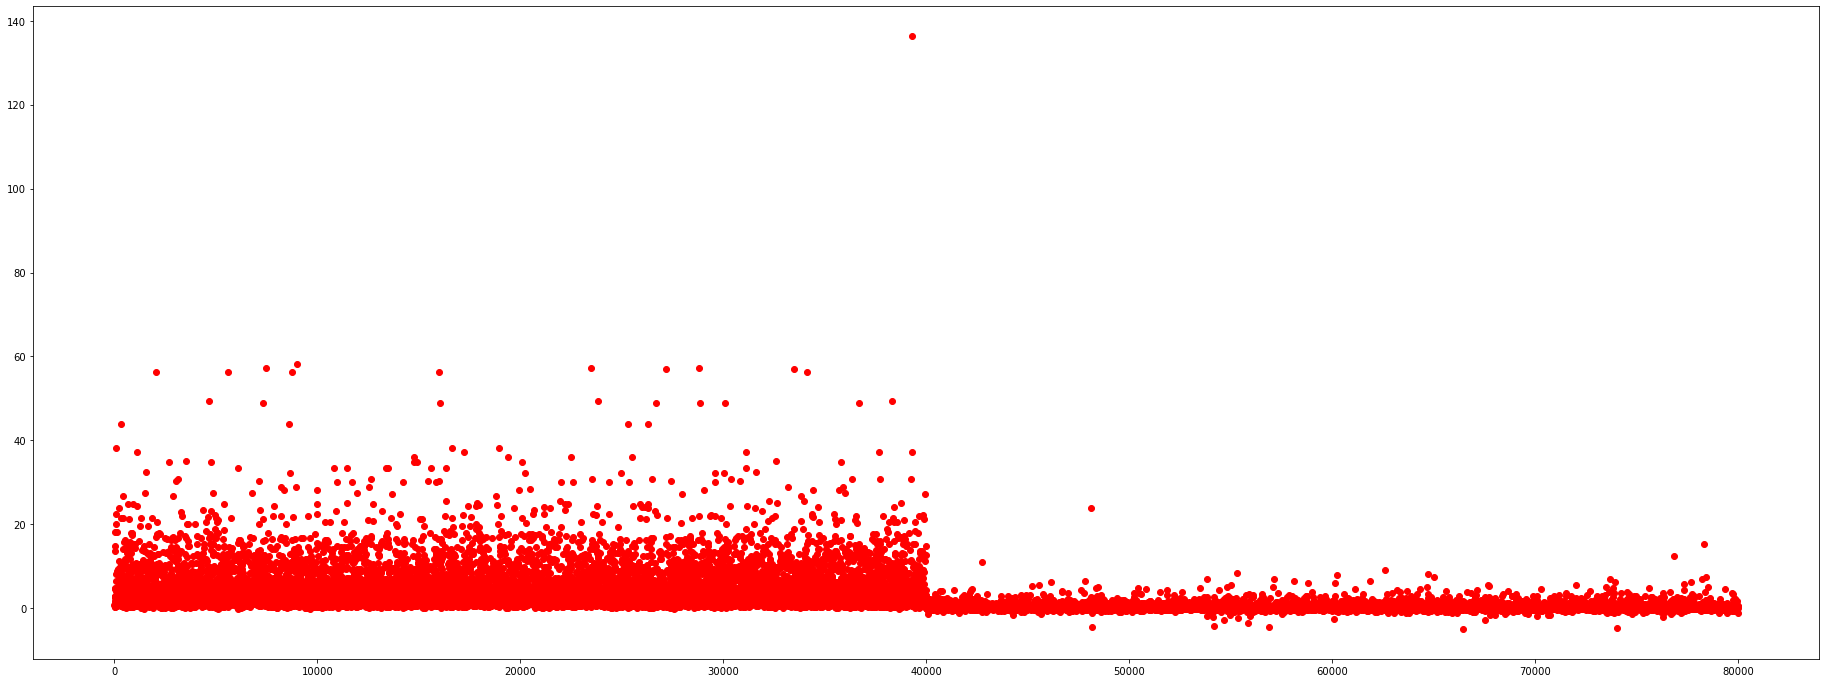

In [65]:
plt.figure(figsize=(32,12))
a=X_test_s.index
b=y_pred_s
c=y_test_s
plt.scatter(x=a,y=b,color='r',label ='predict')
plt.show()

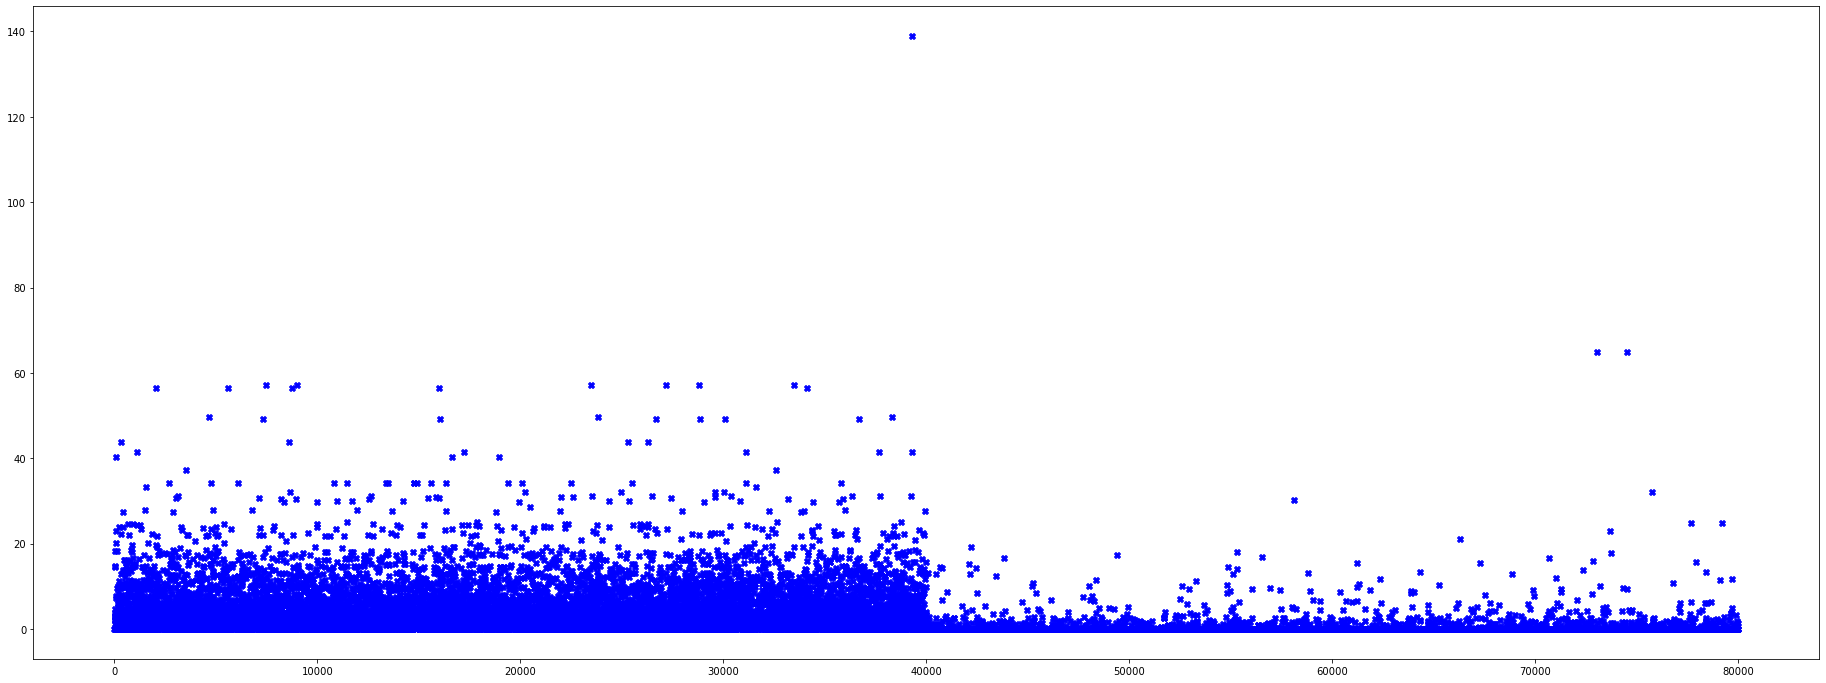

In [66]:
plt.figure(figsize=(32,12))
plt.scatter(x=a,y=c,color='b',label='real',marker='X')
plt.show()

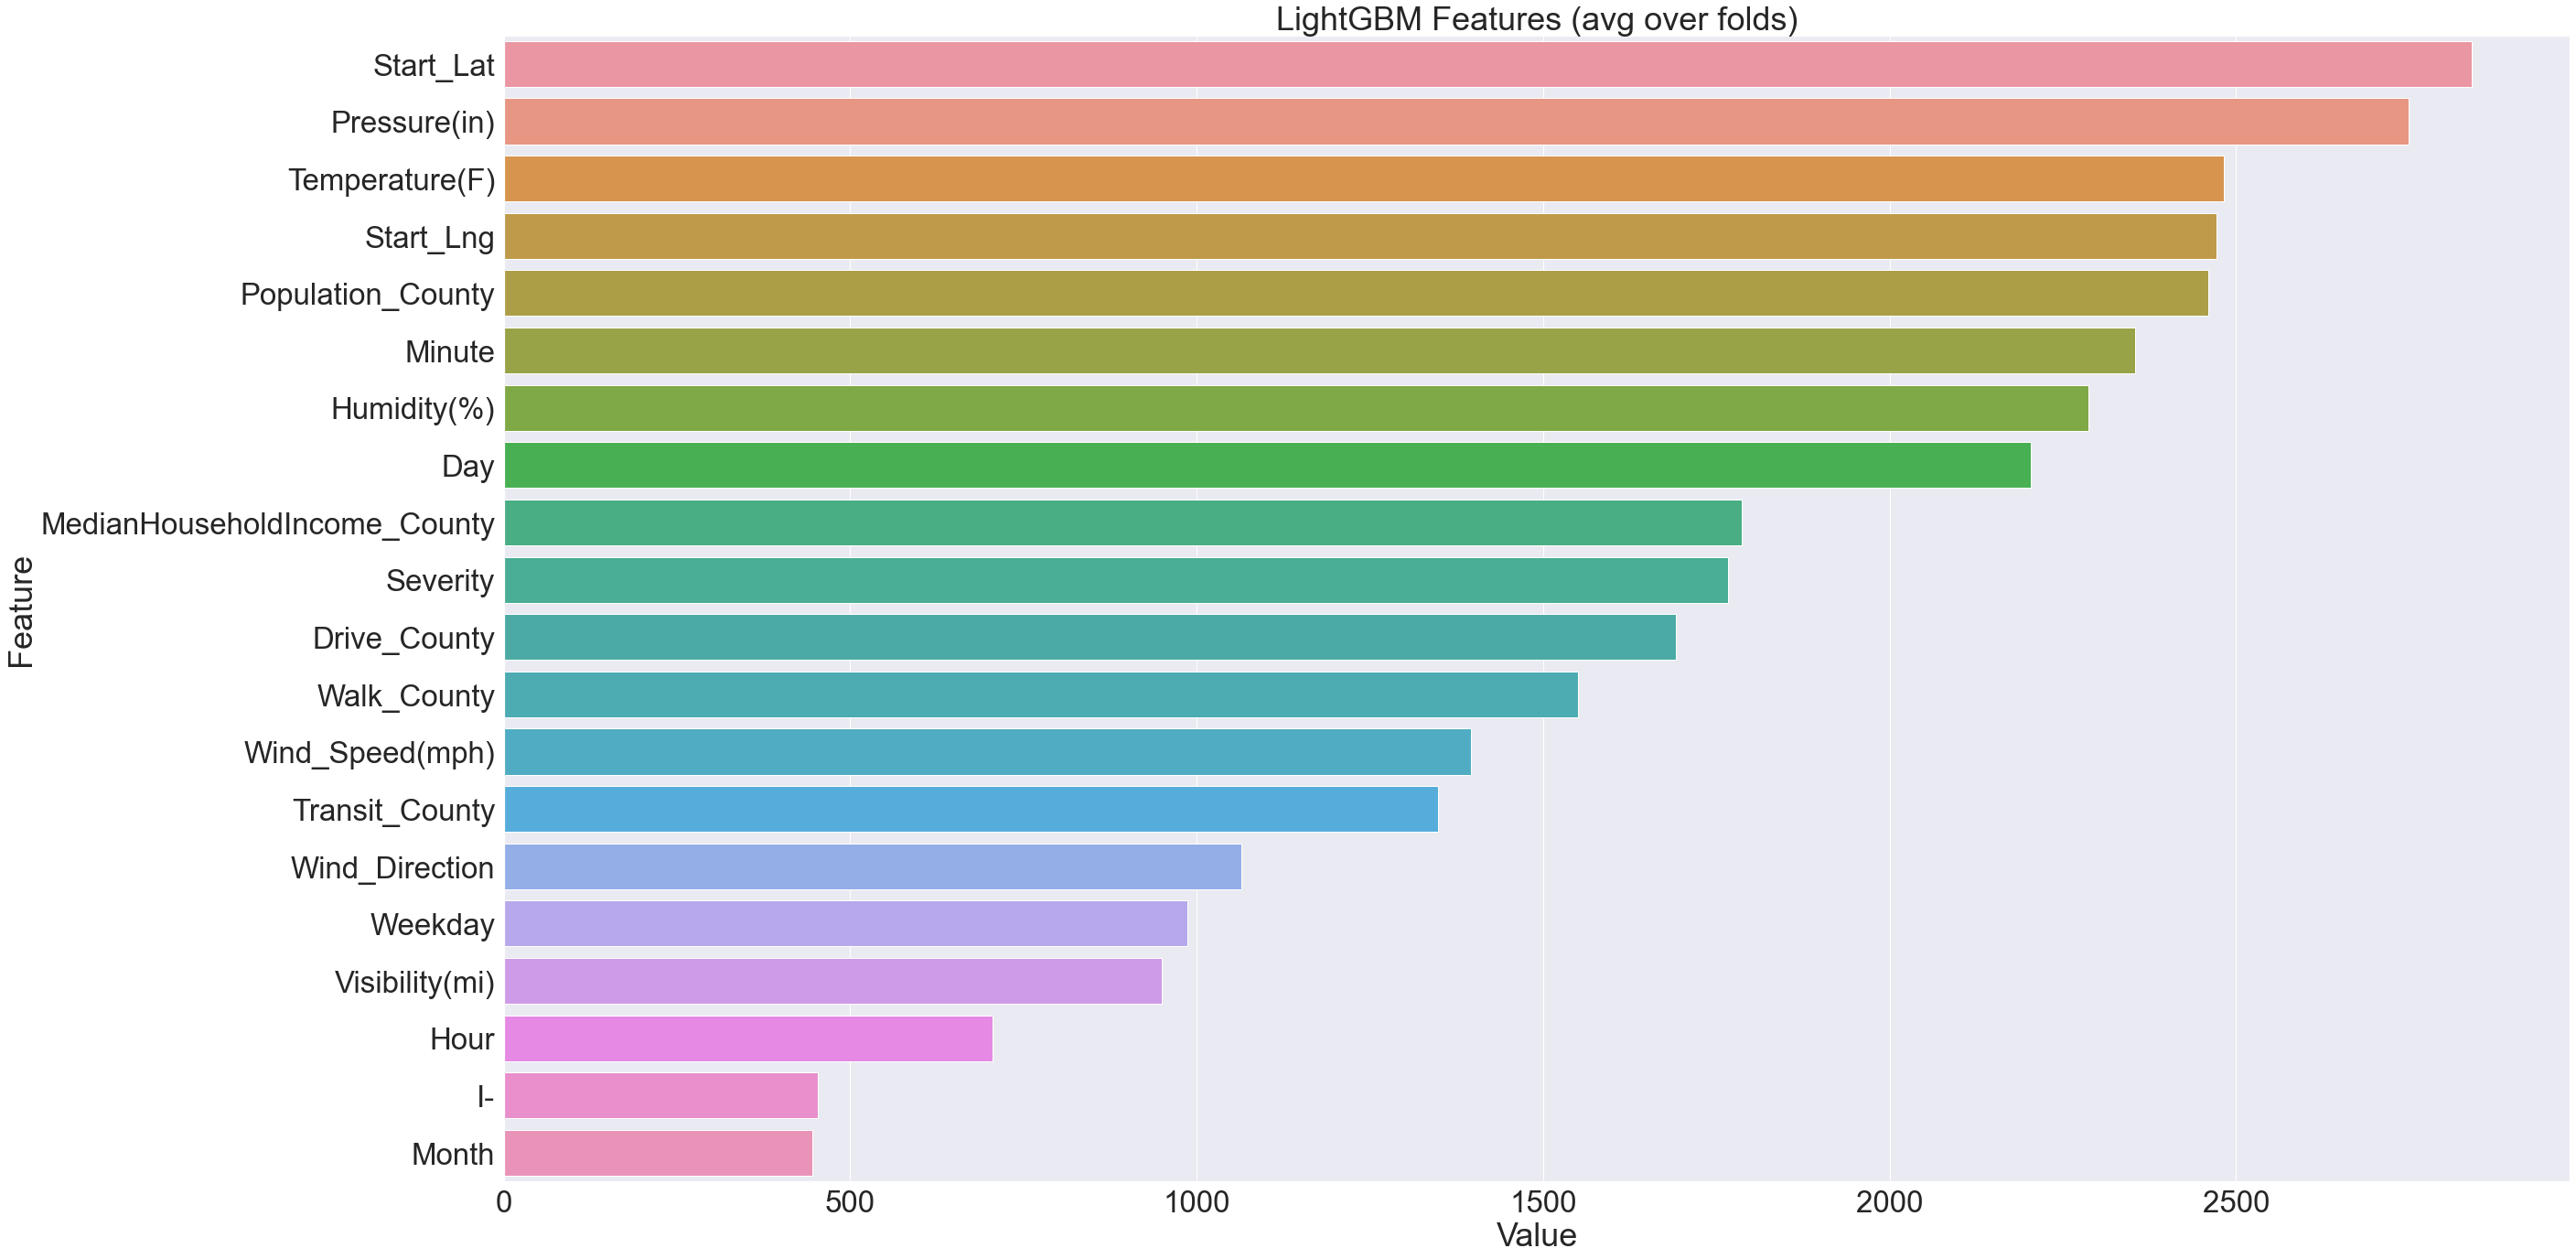

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 3)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(gbm, X=X , num = 20)

# Time(minute)

In [72]:
data=data[data['Duration']<1200]

In [73]:
X=data.drop(['Unnamed: 0','Severity4','Distance(mi)','Duration'],axis=1)
y_t=data.Duration
y_s=data['Distance(mi)']

In [74]:
X_train_t, X_test_t, y_train_t, y_test_t = TTS(X, y_t, test_size=0.30, random_state=710)

In [75]:

# 转换为Dataset数据格式
lgb_train = lgb.Dataset(X_train_t, y_train_t)
lgb_eval = lgb.Dataset(X_test_t, y_test_t, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': 'l2',  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1,  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=5)

# 模型预测
y_pred_t = gbm.predict(X_test_t, num_iteration=gbm.best_iteration)


# 模型评估
print('The rmse of prediction is:', MSE(y_test_t, y_pred_t) ** 0.5)
print('The mean_absolute_error of prediction is:',MAE(y_test_t, y_pred_t))
# cv_results = lgb.cv(params, data_train, num_boost_round=1000, nfold=5, is_unbalance=True, stratified=False, shuffle=True, metrics='auc',early_stopping_rounds=5,seed=0)
# print('best n_estimators:', len(cv_results['auc-mean']))
# print('best cv score:', pd.Series(cv_results['auc-mean']).max())

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2752
[LightGBM] [Info] Number of data points in the train set: 55990, number of used features: 66
[LightGBM] [Info] Start training from score 105.499839
[1]	valid_0's l2: 7536.08
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 7335.49
[3]	valid_0's l2: 7146.69
[4]	valid_0's l2: 7024.44
[5]	valid_0's l2: 6917.84
[6]	valid_0's l2: 6818.59
[7]	valid_0's l2: 6678.16
[8]	valid_0's l2: 6549.89
[9]	valid_0's l2: 6427.04
[10]	valid_0's l2: 6352.81
[11]	valid_0's l2: 6243.12
[12]	valid_0's l2: 6143.93
[13]	valid_0's l2: 6048.04
[14]	valid_0's l2: 5963.7
[15]	valid_0's l2: 5881.68
[16]	valid_0's l2: 5824.49
[17]	valid_0's l2: 5744.3
[18]	valid_0's l2: 5673.07
[19]	valid_0's l2: 5609.38
[20]	valid_0's l2: 5540.08


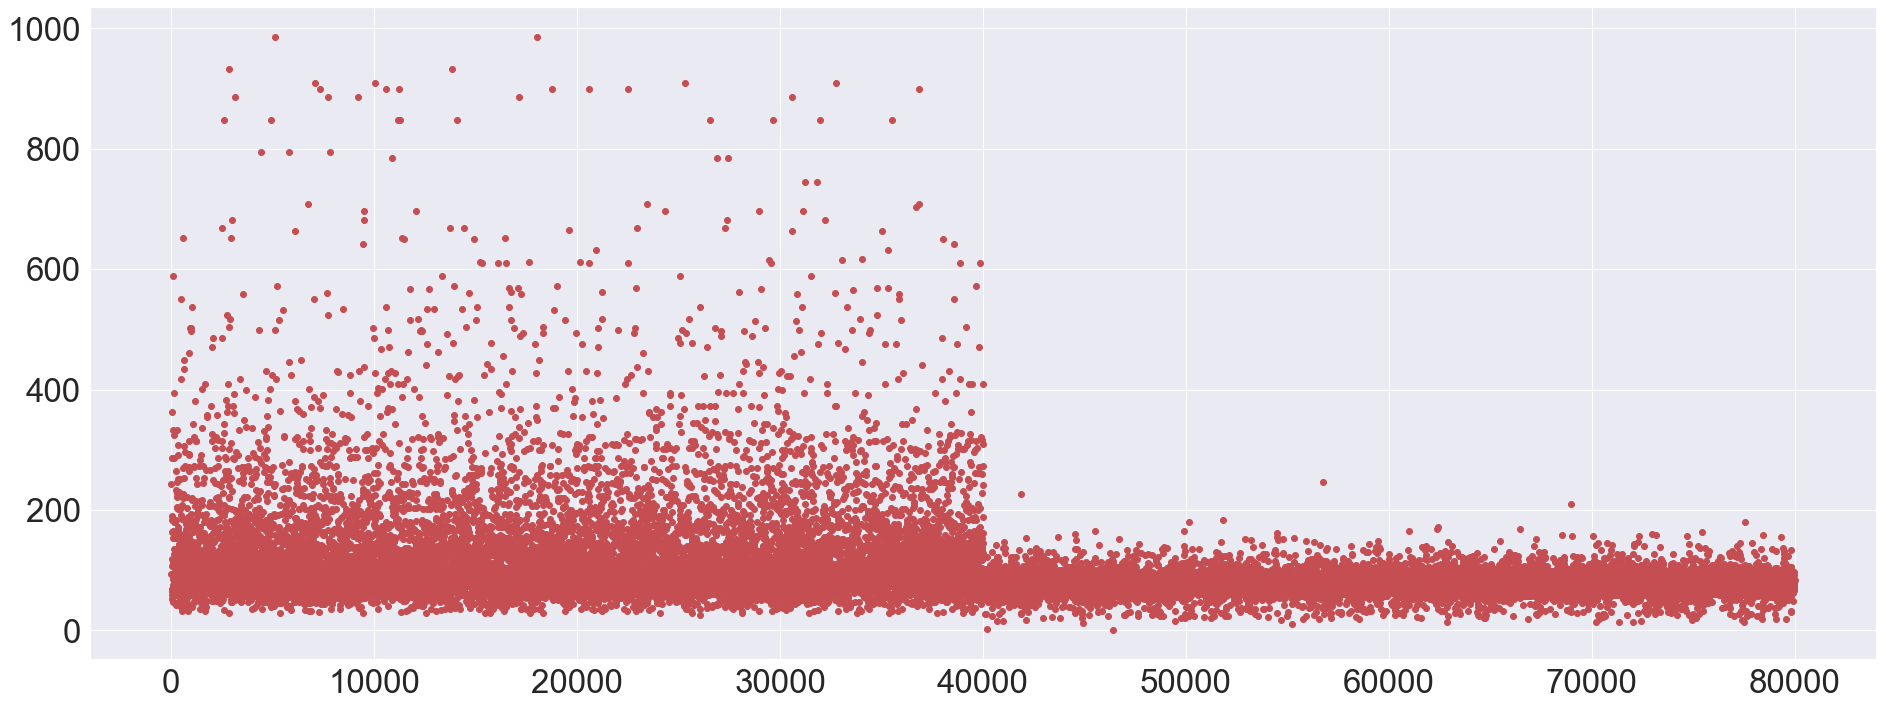

In [76]:
plt.figure(figsize=(32,12))
a=X_test_t.index
b=y_pred_t
c=y_test_t
plt.scatter(x=a,y=b,color='r',label ='predict')
plt.show()

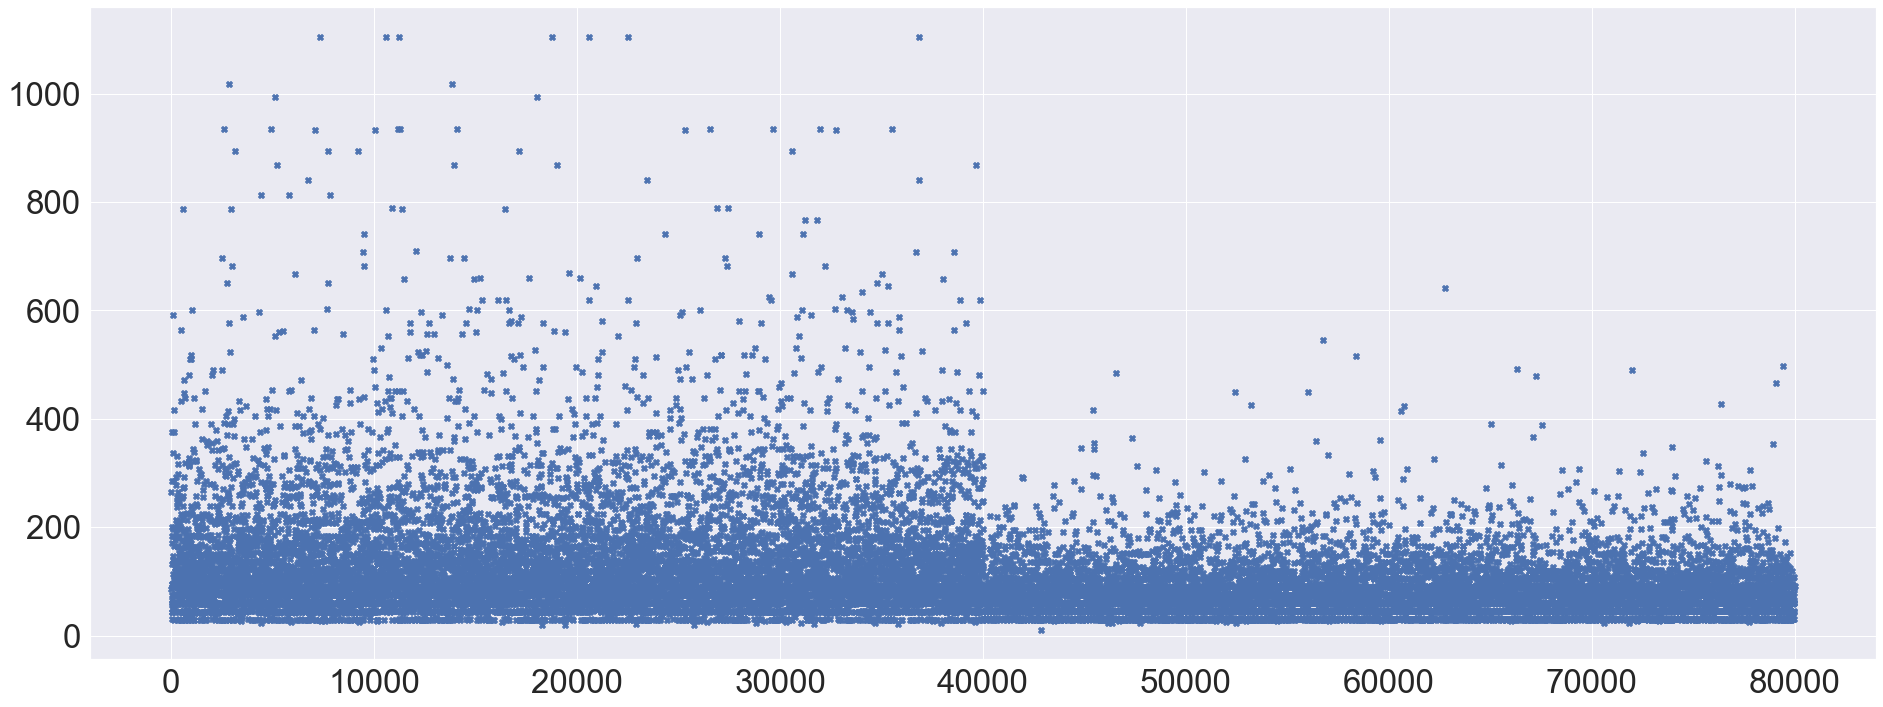

In [77]:
plt.figure(figsize=(32,12))
plt.scatter(x=a,y=c,color='b',label='real',marker='X')
plt.show()

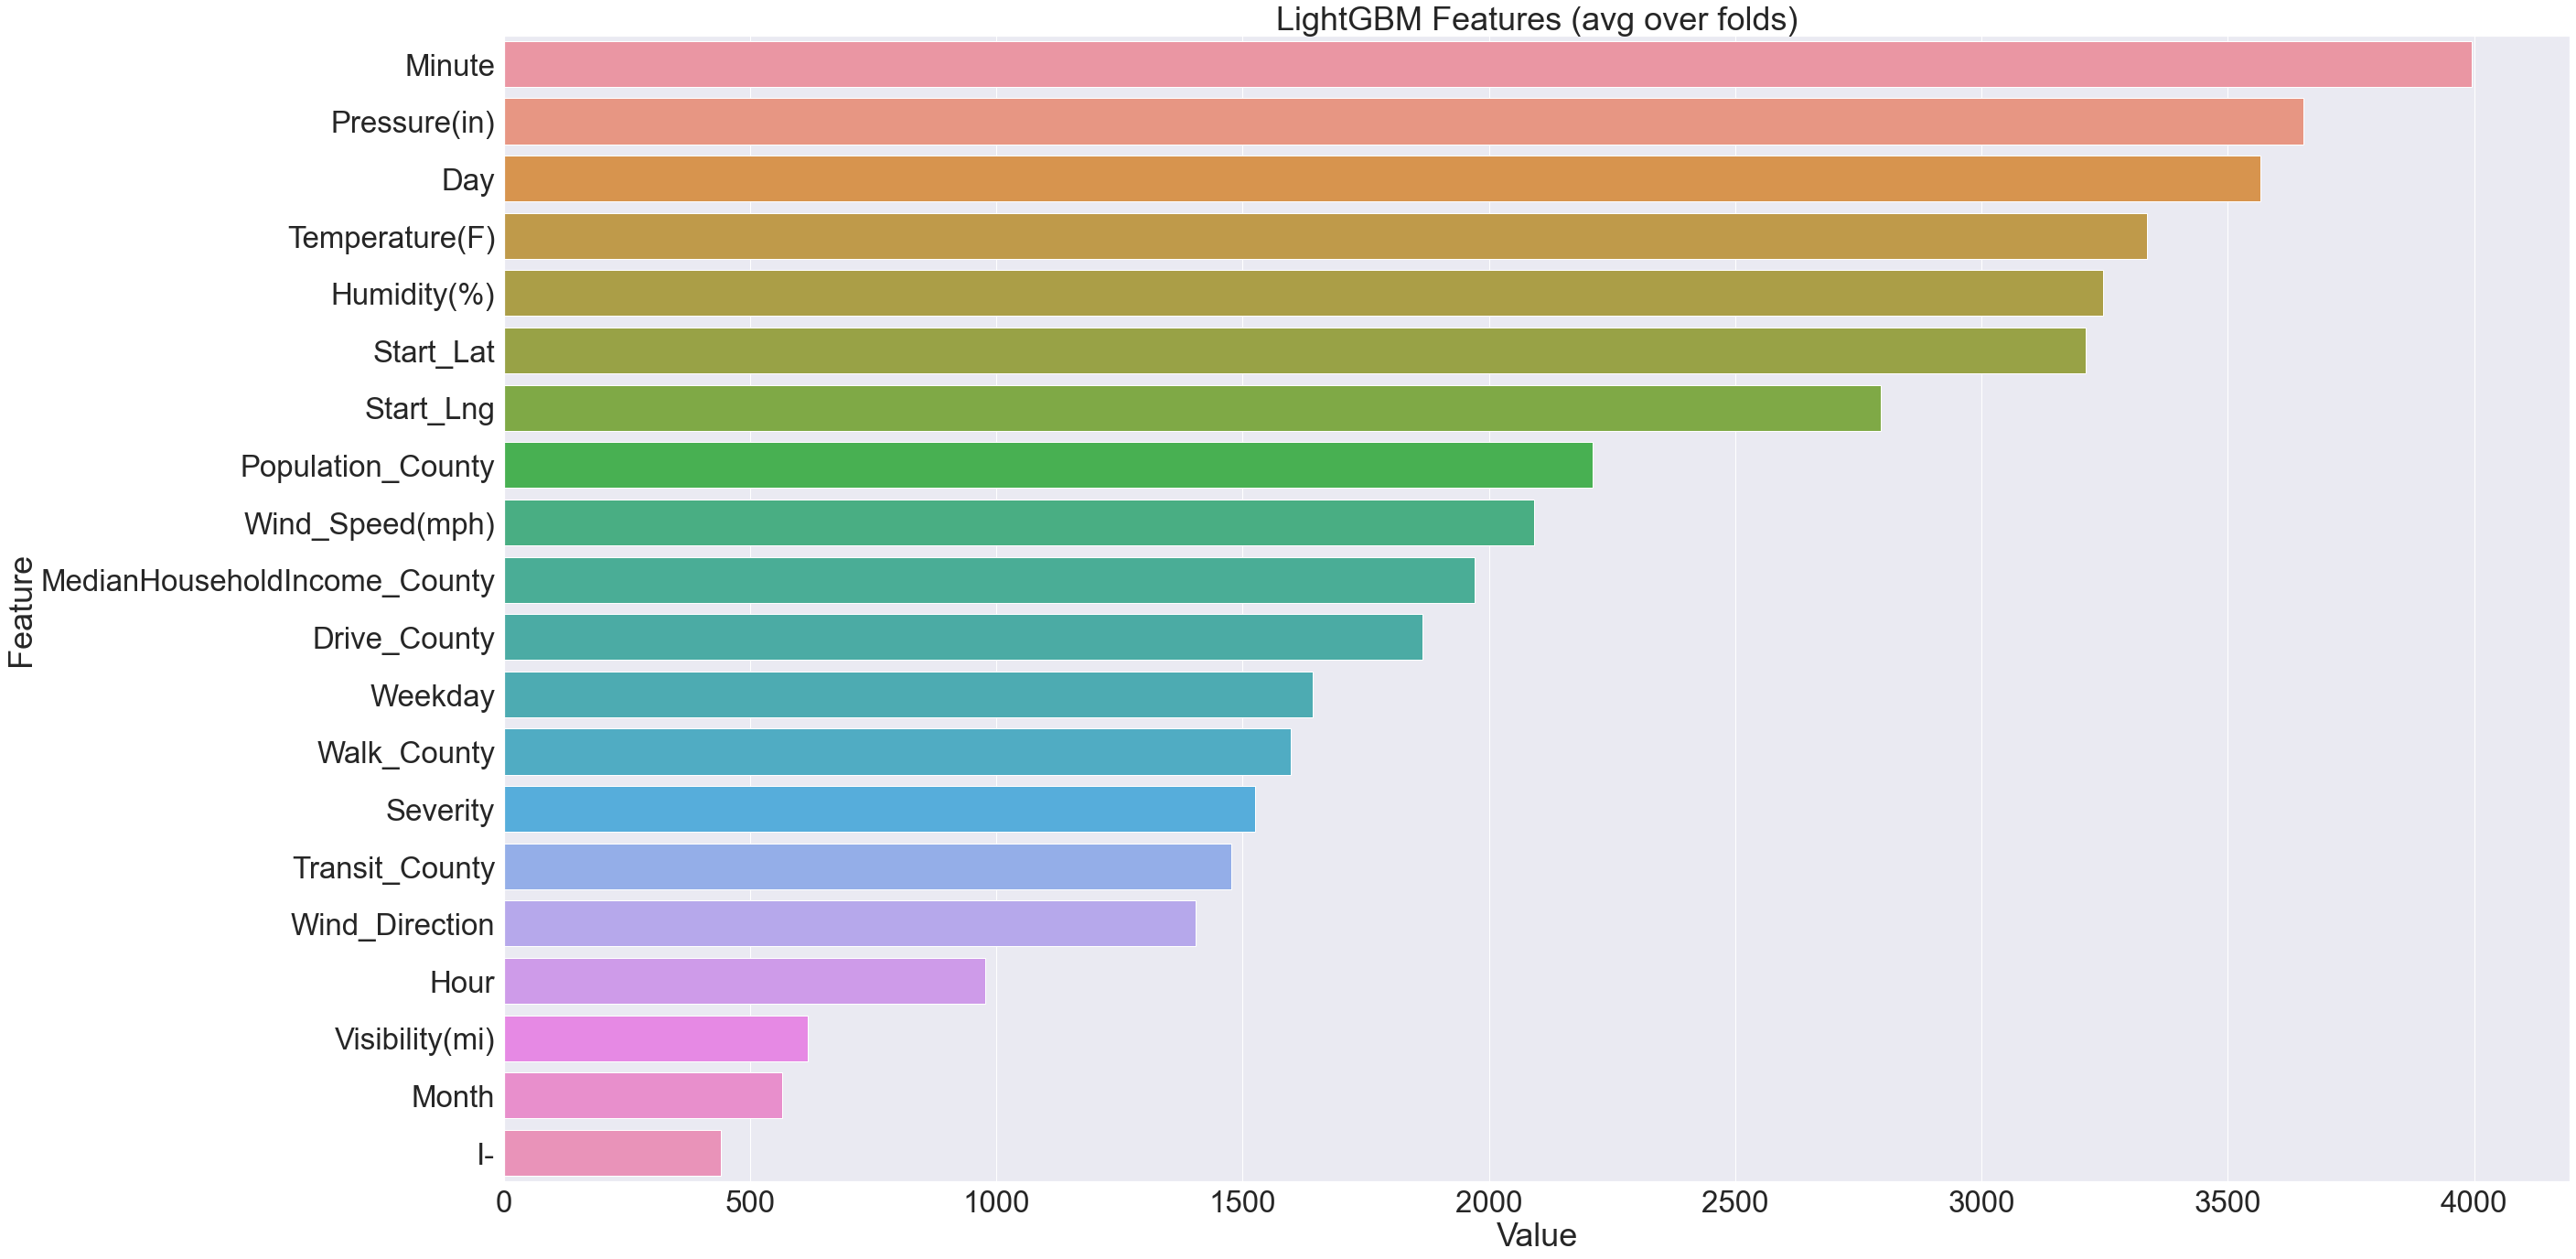

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 3)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(gbm, X=X , num = 20)